# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [41]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 628


In [42]:
cities

['maun',
 'taolanaro',
 'hilo',
 'hihifo',
 'sentyabrskiy',
 'ballina',
 'new norfolk',
 'ketchikan',
 'palmas',
 'kattivakkam',
 'mecca',
 'springbok',
 'bambous virieux',
 'buariki',
 'rikitea',
 'kutum',
 'puri',
 'flin flon',
 'paragominas',
 'khatanga',
 'lumut',
 'grand river south east',
 'nizhneyansk',
 'ouesso',
 'avarua',
 'adrar',
 'tezu',
 'tuatapere',
 'albany',
 'cape town',
 'jalu',
 'butaritari',
 'dikson',
 'mackay',
 'saskylakh',
 'ushuaia',
 'yanan',
 'nemuro',
 'lasa',
 'walvis bay',
 'jamestown',
 'santa maria',
 'viedma',
 'pevek',
 'mataura',
 'busselton',
 'yakovlevskoye',
 'severodvinsk',
 'san patricio',
 'maxixe',
 'atuona',
 'kishanpur',
 'mar del plata',
 'opuwo',
 'ondorhaan',
 'yellowknife',
 'saint-augustin',
 'bluff',
 'hasaki',
 'atar',
 'tiksi',
 'arman',
 'georgetown',
 'esmeraldas',
 'mys shmidta',
 'saint anthony',
 'vila velha',
 'illoqqortoormiut',
 'hobart',
 'fortuna',
 'airai',
 'darab',
 'sur',
 'punta arenas',
 'thompson',
 'kodiak',
 'roald

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [43]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Create endpoint URL with each city
    city_url = f"{url}lat={lats[i]}&lon={lngs[i]}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = (city_weather['coord']['lat'])
        city_lng = (city_weather['coord']['lon'])
        city_max_temp = (city_weather['main']['temp_max'])
        city_humidity = (city_weather['main']['humidity'])
        city_clouds = (city_weather['clouds']['all'])
        city_wind = (city_weather['wind']['speed'])
        city_country = (city_weather['sys']['country'])
        city_date = (city_weather['dt'])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | maun
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | hilo
City not found. Skipping...
Processing Record 4 of Set 1 | hihifo
City not found. Skipping...
Processing Record 5 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 6 of Set 1 | ballina
City not found. Skipping...
Processing Record 7 of Set 1 | new norfolk
City not found. Skipping...
Processing Record 8 of Set 1 | ketchikan
Processing Record 9 of Set 1 | palmas
Processing Record 10 of Set 1 | kattivakkam
City not found. Skipping...
Processing Record 11 of Set 1 | mecca
City not found. Skipping...
Processing Record 12 of Set 1 | springbok
City not found. Skipping...
Processing Record 13 of Set 1 | bambous virieux
Processing Record 14 of Set 1 | buariki
City not found. Skipping...
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | kutum
City not found

City not found. Skipping...
Processing Record 33 of Set 3 | srednekolymsk
Processing Record 34 of Set 3 | jerez
City not found. Skipping...
Processing Record 35 of Set 3 | kumylzhenskaya
City not found. Skipping...
Processing Record 36 of Set 3 | tsihombe
City not found. Skipping...
Processing Record 37 of Set 3 | talnakh
City not found. Skipping...
Processing Record 38 of Set 3 | luocheng
City not found. Skipping...
Processing Record 39 of Set 3 | ust-kamchatsk
Processing Record 40 of Set 3 | rundu
City not found. Skipping...
Processing Record 41 of Set 3 | praia
Processing Record 42 of Set 3 | castro
Processing Record 43 of Set 3 | yangjiang
Processing Record 44 of Set 3 | luanda
City not found. Skipping...
Processing Record 45 of Set 3 | ardalstangen
City not found. Skipping...
Processing Record 46 of Set 3 | kemijarvi
City not found. Skipping...
Processing Record 47 of Set 3 | samusu
City not found. Skipping...
Processing Record 48 of Set 3 | marcona
City not found. Skipping...
Pro

Processing Record 16 of Set 6 | wahran
Processing Record 17 of Set 6 | andenes
City not found. Skipping...
Processing Record 18 of Set 6 | mersing
City not found. Skipping...
Processing Record 19 of Set 6 | dire dawa
City not found. Skipping...
Processing Record 20 of Set 6 | owando
City not found. Skipping...
Processing Record 21 of Set 6 | yar-sale
City not found. Skipping...
Processing Record 22 of Set 6 | wanaka
City not found. Skipping...
Processing Record 23 of Set 6 | severo-kurilsk
City not found. Skipping...
Processing Record 24 of Set 6 | pedernales
City not found. Skipping...
Processing Record 25 of Set 6 | locri
Processing Record 26 of Set 6 | mitsamiouli
City not found. Skipping...
Processing Record 27 of Set 6 | hanna
City not found. Skipping...
Processing Record 28 of Set 6 | lafia
City not found. Skipping...
Processing Record 29 of Set 6 | clyde river
City not found. Skipping...
Processing Record 30 of Set 6 | katsuura
City not found. Skipping...
Processing Record 31 of

City not found. Skipping...
Processing Record 49 of Set 8 | kerema
Processing Record 0 of Set 9 | lalsk
City not found. Skipping...
Processing Record 1 of Set 9 | mosquera
City not found. Skipping...
Processing Record 2 of Set 9 | chokurdakh
City not found. Skipping...
Processing Record 3 of Set 9 | mbeya
City not found. Skipping...
Processing Record 4 of Set 9 | mayo
City not found. Skipping...
Processing Record 5 of Set 9 | mombetsu
City not found. Skipping...
Processing Record 6 of Set 9 | havre-saint-pierre
City not found. Skipping...
Processing Record 7 of Set 9 | palmer
City not found. Skipping...
Processing Record 8 of Set 9 | san juan
City not found. Skipping...
Processing Record 9 of Set 9 | ahuimanu
Processing Record 10 of Set 9 | gurgan
Processing Record 11 of Set 9 | sitka
City not found. Skipping...
Processing Record 12 of Set 9 | cedar city
City not found. Skipping...
Processing Record 13 of Set 9 | bur gabo
City not found. Skipping...
Processing Record 14 of Set 9 | plac

City not found. Skipping...
Processing Record 32 of Set 11 | graaff-reinet
City not found. Skipping...
Processing Record 33 of Set 11 | tura
City not found. Skipping...
Processing Record 34 of Set 11 | abaza
City not found. Skipping...
Processing Record 35 of Set 11 | keetmanshoop
Processing Record 36 of Set 11 | koraput
Processing Record 37 of Set 11 | sumbawa
City not found. Skipping...
Processing Record 38 of Set 11 | hambantota
Processing Record 39 of Set 11 | dhidhdhoo
Processing Record 40 of Set 11 | skagastrond
City not found. Skipping...
Processing Record 41 of Set 11 | seoul
City not found. Skipping...
Processing Record 42 of Set 11 | liverpool
City not found. Skipping...
Processing Record 43 of Set 11 | ziarat
City not found. Skipping...
Processing Record 44 of Set 11 | huambo
Processing Record 45 of Set 11 | luderitz
City not found. Skipping...
Processing Record 46 of Set 11 | hualmay
City not found. Skipping...
Processing Record 47 of Set 11 | cabra
Processing Record 48 of 

In [44]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          164
Lat           164
Lng           164
Max Temp      164
Humidity      164
Cloudiness    164
Wind Speed    164
Country       164
Date          164
dtype: int64

In [45]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,maun,-20.3240,23.6512,27.94,48,95,2.72,BW,1675022151
1,ketchikan,52.7463,-132.7516,6.00,60,13,8.05,CA,1675022156
2,palmas,-9.8302,-47.4392,29.61,56,74,1.67,BR,1675022157
3,bambous virieux,-30.5194,18.1414,17.71,49,0,1.26,ZA,1675022160
4,rikitea,1.5626,171.5894,27.00,81,91,9.41,KI,1675022161


In [46]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [47]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,maun,-20.3240,23.6512,27.94,48,95,2.72,BW,1675022151
1,ketchikan,52.7463,-132.7516,6.00,60,13,8.05,CA,1675022156
2,palmas,-9.8302,-47.4392,29.61,56,74,1.67,BR,1675022157
3,bambous virieux,-30.5194,18.1414,17.71,49,0,1.26,ZA,1675022160
4,rikitea,1.5626,171.5894,27.00,81,91,9.41,KI,1675022161


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

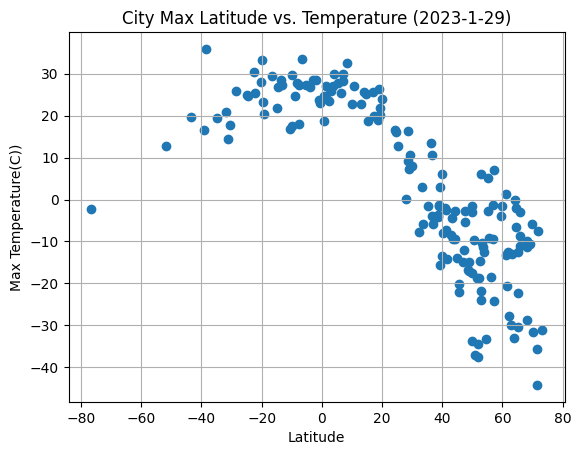

In [48]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C))')
plt.title('City Max Latitude vs. Temperature (2023-1-29)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

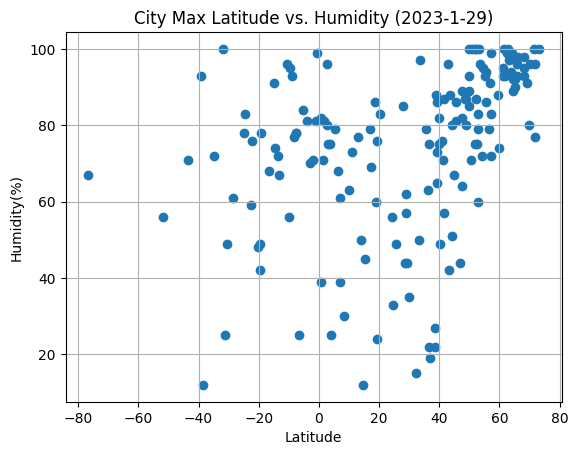

In [49]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Max Latitude vs. Humidity (2023-1-29)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

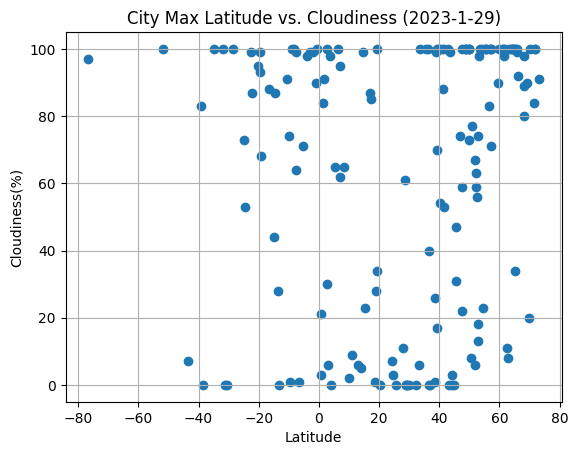

In [50]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Max Latitude vs. Cloudiness (2023-1-29)')
plt.grid()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

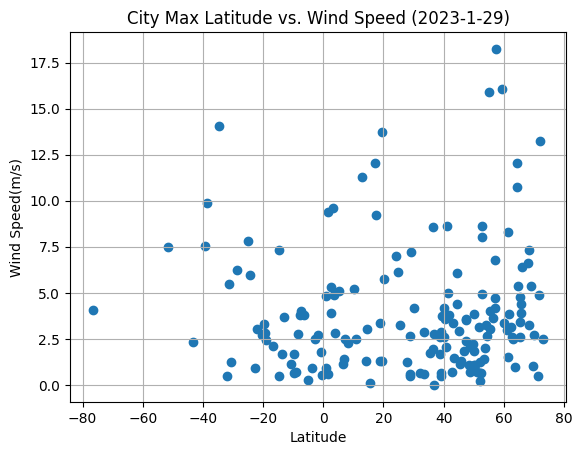

In [51]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')
plt.title('City Max Latitude vs. Wind Speed (2023-1-29)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [52]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
city_data_df.corr()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
Lat,1.000000,-0.070186,-0.795881,0.374357,0.126996,0.029545,-0.027216
Lng,-0.070186,1.000000,0.013533,0.030368,-0.098136,-0.144634,-0.051134
Max Temp,-0.795881,0.013533,1.000000,-0.450837,-0.144445,0.130182,0.043262
Humidity,0.374357,0.030368,-0.450837,1.000000,0.498036,0.006835,0.011755
Cloudiness,0.126996,-0.098136,-0.144445,0.498036,1.000000,0.108771,0.069134
Wind Speed,0.029545,-0.144634,0.130182,0.006835,0.108771,1.000000,0.029116
Date,-0.027216,-0.051134,0.043262,0.011755,0.069134,0.029116,1.000000


In [53]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ketchikan,52.7463,-132.7516,6.00,60,13,8.05,CA,1675022156
4,rikitea,1.5626,171.5894,27.00,81,91,9.41,KI,1675022161
5,puri,14.6834,25.3391,25.17,12,99,3.02,SD,1675022163
6,paragominas,57.1482,-102.8247,-24.16,83,100,4.72,CA,1675022166
8,grand river south east,3.6547,100.3254,27.14,75,98,4.90,MY,1675022169


In [54]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,maun,-20.3240,23.6512,27.94,48,95,2.72,BW,1675022151
2,palmas,-9.8302,-47.4392,29.61,56,74,1.67,BR,1675022157
3,bambous virieux,-30.5194,18.1414,17.71,49,0,1.26,ZA,1675022160
7,khatanga,-3.8667,-48.2233,26.84,81,98,0.91,BR,1675022167
12,nemuro,-22.0941,149.6732,25.38,76,87,3.06,AU,1675022196


###  Temperature vs. Latitude Linear Regression Plot

The R Value is -0.8357601995252223


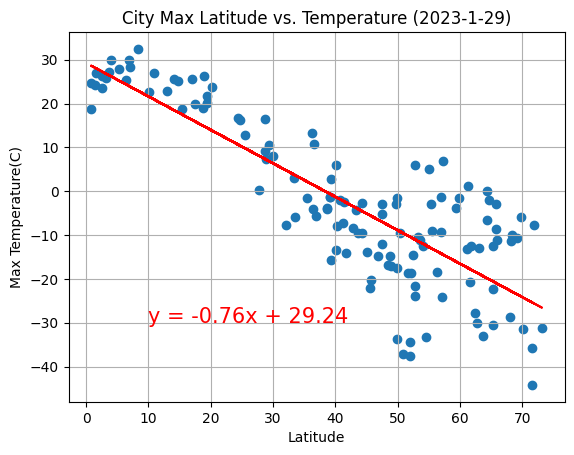

In [56]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title('City Max Latitude vs. Temperature (2023-1-29)')
plt.grid()
x_values1 = northern_hemi_df['Lat']
y_values1 = northern_hemi_df['Max Temp']
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x_values1, y_values1)
regress_values1 = x_values1 * slope1 + intercept1
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))
plt.plot(x_values1,regress_values1,"r-")
plt.annotate(line_eq1,(10,-30),fontsize=15,color="red")
print (f"The R Value is {rvalue1}")
plt.show()

The R Value is 0.6130517334758578


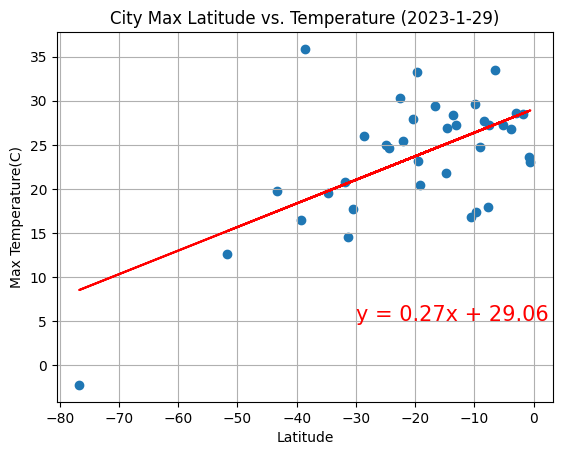

In [58]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title('City Max Latitude vs. Temperature (2023-1-29)')
plt.grid()
x_values1 = southern_hemi_df['Lat']
y_values1 = southern_hemi_df['Max Temp']
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x_values1, y_values1)
regress_values1 = x_values1 * slope1 + intercept1
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))
plt.plot(x_values1,regress_values1,"r-")
plt.annotate(line_eq1,(-30,5),fontsize=15,color="red")
print (f"The R Value is {rvalue1}")
plt.show()

**Discussion about the linear relationship:** While there is a moderate positive correlation with max latitude and temperature in the Southern Hemisphere, there is relatively stronger negative correlation with max latitude and temperate in the Northern Hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The R Value is 0.5378326626244527


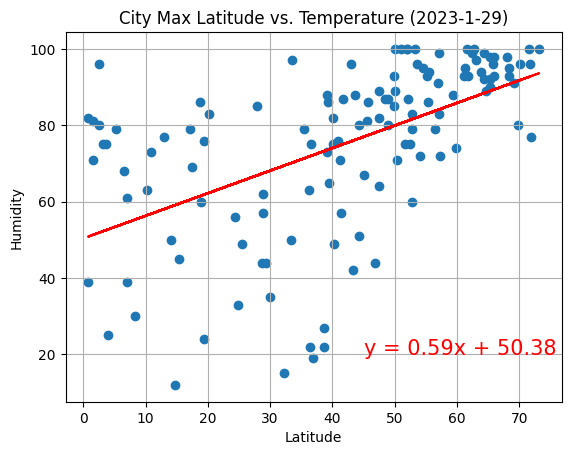

In [59]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Max Latitude vs. Humidity (2023-1-29)')
plt.grid()
x_values1 = northern_hemi_df['Lat']
y_values1 = northern_hemi_df['Humidity']
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x_values1, y_values1)
regress_values1 = x_values1 * slope1 + intercept1
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))
plt.plot(x_values1,regress_values1,"r-")
plt.annotate(line_eq1,(45,20),fontsize=15,color="red")
print (f"The R Value is {rvalue1}")
plt.show()

The R Value is 0.26034293191976937


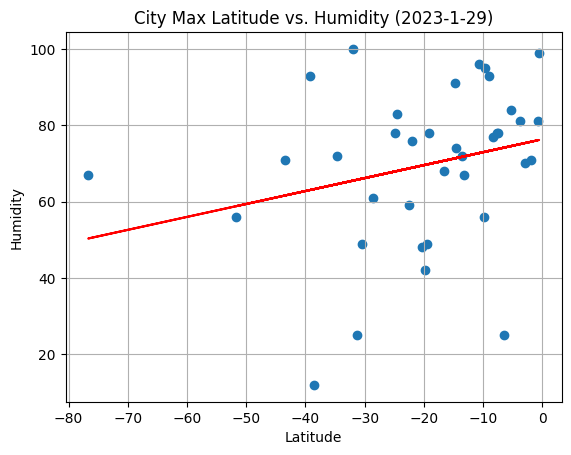

In [61]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Max Latitude vs. Humidity (2023-1-29)')
plt.grid()
x_values1 = southern_hemi_df['Lat']
y_values1 = southern_hemi_df['Humidity']
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x_values1, y_values1)
regress_values1 = x_values1 * slope1 + intercept1
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))
plt.plot(x_values1,regress_values1,"r-")
plt.annotate(line_eq1,(-30,-60),fontsize=15,color="red")
print (f"The R Value is {rvalue1}")
plt.show()

**Discussion about the linear relationship:** The latitude is positively correlated with humidity on both Hemipsheres, though the correlation is much more pronounced on the Northern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The R Value is 0.3791487696802231


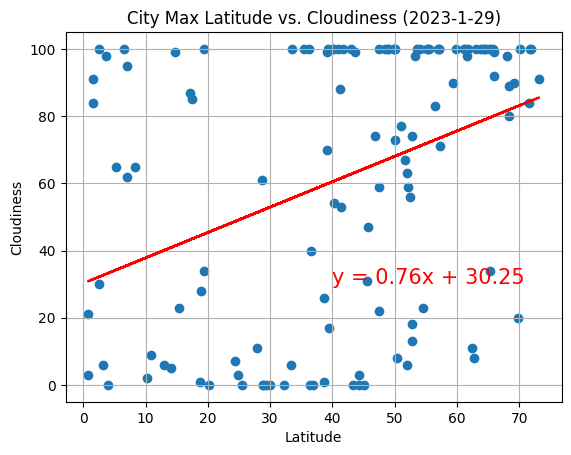

In [62]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Max Latitude vs. Cloudiness (2023-1-29)')
plt.grid()
x_values1 = northern_hemi_df['Lat']
y_values1 = northern_hemi_df['Cloudiness']
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x_values1, y_values1)
regress_values1 = x_values1 * slope1 + intercept1
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))
plt.plot(x_values1,regress_values1,"r-")
plt.annotate(line_eq1,(40,30),fontsize=15,color="red")
print (f"The R Value is {rvalue1}")
plt.show()

The R Value is 0.08110755797902179


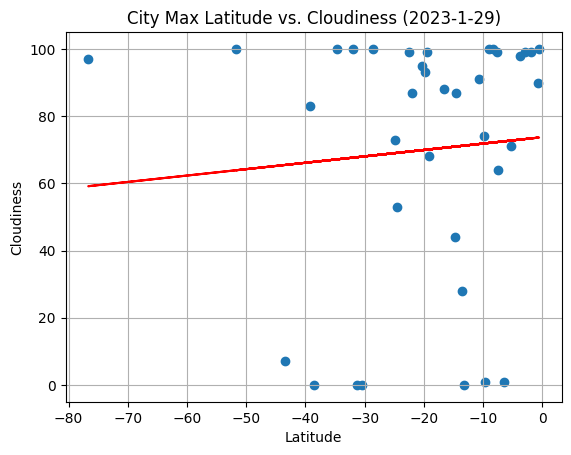

In [63]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Max Latitude vs. Cloudiness (2023-1-29)')
plt.grid()
x_values1 = southern_hemi_df['Lat']
y_values1 = southern_hemi_df['Cloudiness']
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x_values1, y_values1)
regress_values1 = x_values1 * slope1 + intercept1
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))
plt.plot(x_values1,regress_values1,"r-")
plt.annotate(line_eq1,(40,30),fontsize=15,color="red")
print (f"The R Value is {rvalue1}")
plt.show()

**Discussion about the linear relationship:** There is a slight correlation between cloudiness and latitudes on both the Southern and Northern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The R Value is 0.054002300761936295


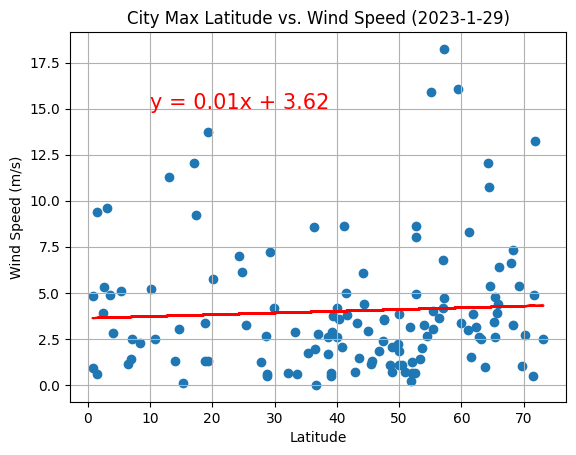

In [64]:
# Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Max Latitude vs. Wind Speed (2023-1-29)')
plt.grid()
x_values1 = northern_hemi_df['Lat']
y_values1 = northern_hemi_df['Wind Speed']
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x_values1, y_values1)
regress_values1 = x_values1 * slope1 + intercept1
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))
plt.plot(x_values1,regress_values1,"r-")
plt.annotate(line_eq1,(10,15),fontsize=15,color="red")
print (f"The R Value is {rvalue1}")
plt.show()

The R Value is -0.46373099709238086


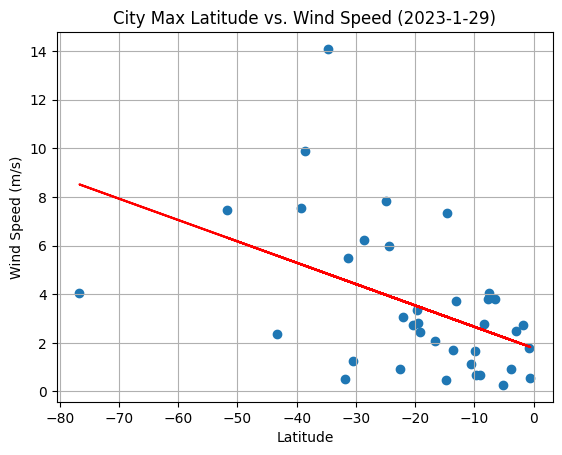

In [65]:
# Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Max Latitude vs. Wind Speed (2023-1-29)')
plt.grid()
x_values1 = southern_hemi_df['Lat']
y_values1 = southern_hemi_df['Wind Speed']
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x_values1, y_values1)
regress_values1 = x_values1 * slope1 + intercept1
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2))
plt.plot(x_values1,regress_values1,"r-")
plt.annotate(line_eq1,(10,15),fontsize=15,color="red")
print (f"The R Value is {rvalue1}")
plt.show()

**Discussion about the linear relationship:** Both Hemispheres express a weak negative correlation between latitude and wind speed, but it is slightly more pronounced in the Southern Hemisphere.